In [28]:
# setting up 

import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import json
import os as os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(1728)

In [4]:
# Adjust directory accordingly
os.chdir('C:\\Users\\wesch\\OneDrive\\20 Spring Summer Urban Science Intensive\\nyconnect\\data')

In [31]:
# load datasets
income = pd.read_csv("./Demographics/Income/household_income_acs2018.csv")
race = pd.read_csv("./Demographics/Basic Count/tract_race_acs2018.csv")
census_tracts = gpd.read_file("./2010_Census_Tracts/geo_export_0ca1f0a1-f242-497a-9f86-91b88fc18647.shp")

In [32]:
## Calculating race as a percentage
race = race.assign(White = lambda x: x["White"]/x["Total"]*100,
                  Black = lambda x: x["Black"]/x["Total"]*100,
                  Native = lambda x: x["Native"]/x["Total"]*100,
                  Asian = lambda x: x["Asian"]/x["Total"]*100,
                  PacificIslander = lambda x: x["Pacific Islander"]/x["Total"]*100,
                  Other = lambda x: x["Other"]/x["Total"]*100,
                  TwoOrMore = lambda x: x["Two or More"]/x["Total"]*100)
race = race[['city', 'tract', 'county', "BoroCTLbl", 'White', 'Black', 'Native', 'Asian', 
                'PacificIslander', 'Other','TwoOrMore','Total']]
# joining the datasets
demographics = income.merge(race.iloc[:,3:10], on = "BoroCTLbl")
demographics = demographics.merge(census_tracts.loc[:, ["BoroCTLbl", "geometry"]], on = ["BoroCTLbl"])

# numeric columns
demographics_num = demographics.iloc[:,4:23]
demographics_num = demographics_num.fillna(0)

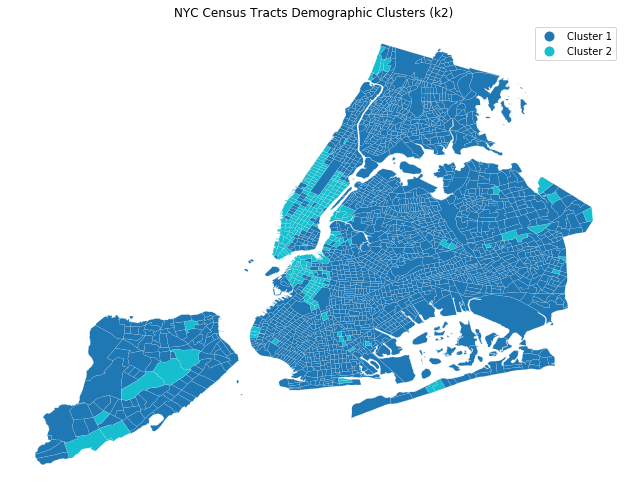

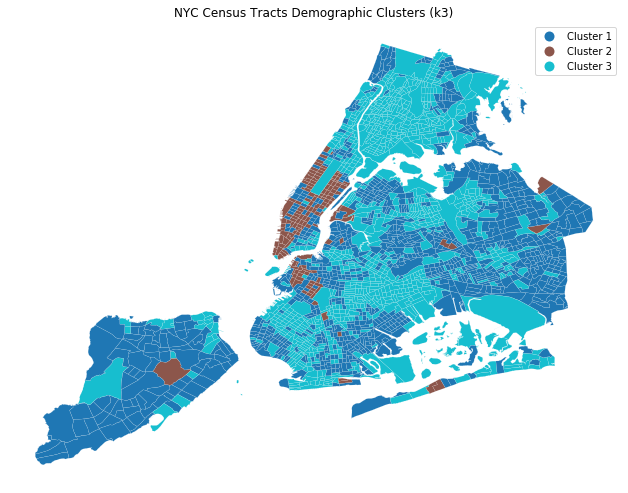

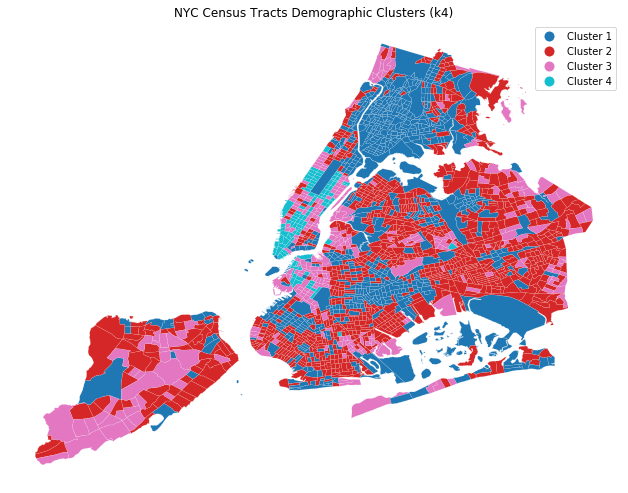

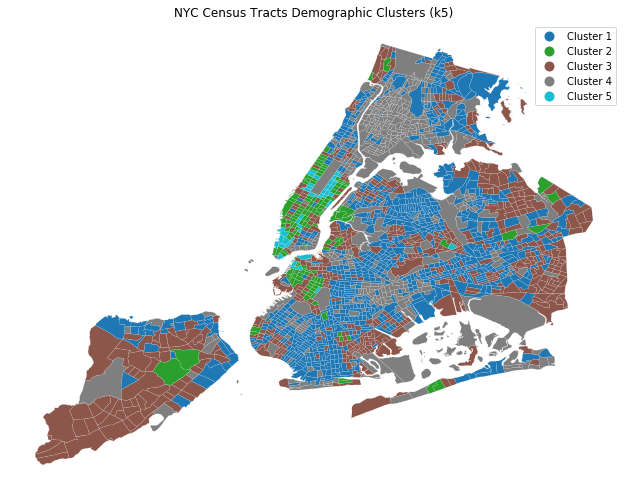

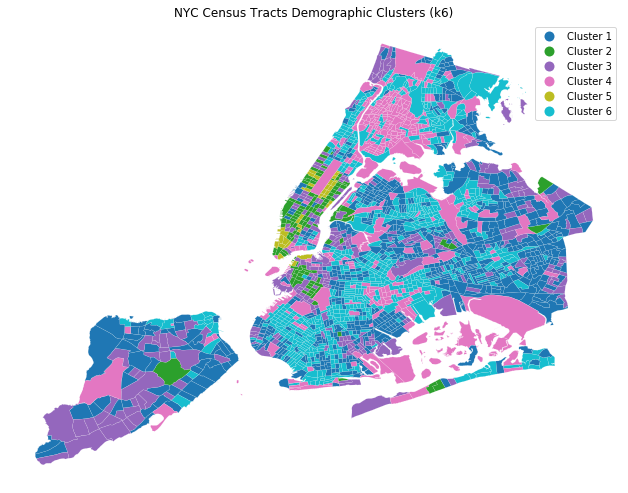

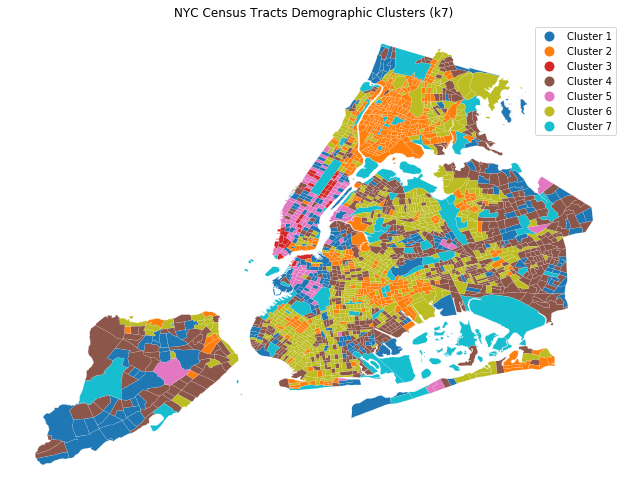

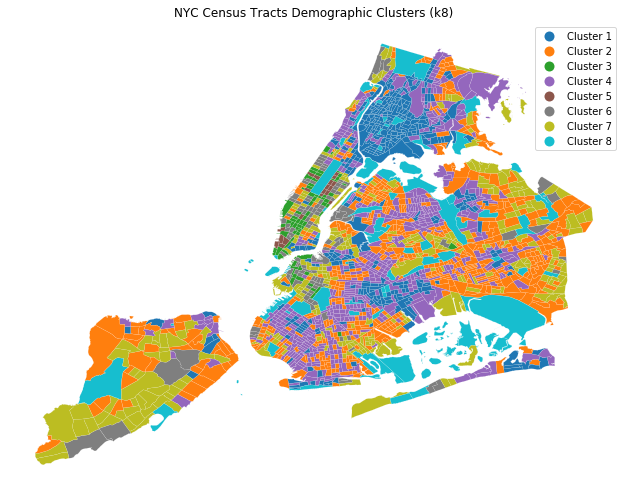

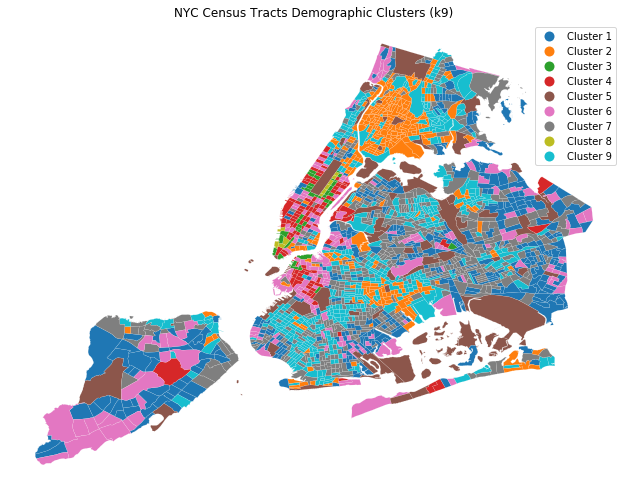

In [39]:
SSE = []
sil_scores = []
k_range = range(2,10)

for i in k_range:
    km_model = KMeans(n_clusters = i)
    res = km_model.fit(demographics_num)
    SSE.append(res.inertia_)
    labels = res.labels_
    sil_score = silhouette_score(demographics_num, labels)
    sil_scores.append(sil_score)
    labels = labels + 1
    labels = [("Cluster " + str(lab)) for lab in labels]
    # plotting map
    #hmap = plt.cm.Pastel1.colors
    f, ax = plt.subplots(1, figsize=(11,11))
    relevant_tracts = demographics.loc[:,["geometry"]]
    relevant_tracts = gpd.GeoDataFrame(relevant_tracts, crs = census_tracts.crs)
    relevant_tracts.assign(cl=labels).plot(column = "cl", categorical = True, k = 2, linewidth = 0.1, 
                                           ax = ax, edgecolor = "white", legend = True)
    ax.set_axis_off()
    ax.set_title("NYC Census Tracts Demographic Clusters (k" + str(i) + ")")
    plt.show()

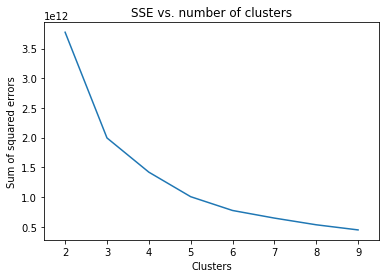

In [37]:
plt.plot(range(2,10),SSE)
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")
plt.title("SSE vs. number of clusters")
plt.xlim(1.5,9.5)
plt.show()

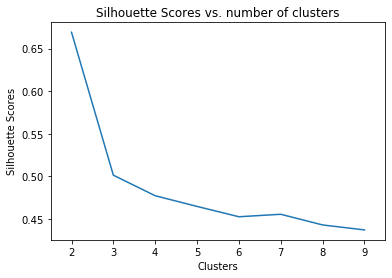

In [40]:
plt.plot(range(2,10),sil_scores)
plt.xlabel("Clusters")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores vs. number of clusters")
plt.xlim(1.5,9.5)
plt.show()